In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
is_local = False
if (is_local):
        print("fail")
else:
        PATH = "./input/earthquake_data/"

In [5]:
file_len = len(os.listdir(PATH))
f"파일 갯수는 {file_len!r} 입니다 "

'파일 갯수는 7 입니다 '

In [6]:
data_list = os.listdir(PATH)
data_list

['3332325_0.dat',
 '3332325_15.dat',
 '3332325_30.dat',
 '3332325_45.dat',
 '3332325_60.dat',
 '3332325_75.dat',
 '3332325_90.dat']

In [20]:
path = PATH + data_list[0] 
path
data_df = pd.read_csv(path, names=['time', '_x', '_y', '_z'],header=None, error_bad_lines=False )
data_df

,time,_x,_y,_z
0,1.325347e+09,-3.197749e-08,1.670632e-08,-2.633049e-10
1,1.325347e+09,2.591352e-08,-1.209819e-08,1.488334e-09
2,1.325347e+09,-2.678963e-09,-1.119580e-08,-1.555271e-09
3,1.325347e+09,5.040576e-09,1.289168e-08,5.447114e-09
4,1.325347e+09,-7.528876e-09,-3.073363e-09,-1.633640e-08
...,...,...,...,...
8593,1.325347e+09,4.618772e-08,-1.682100e-08,-1.452421e-08
8594,1.325347e+09,-1.443892e-08,6.889643e-09,-1.352517e-08
8595,1.325347e+09,-2.227191e-08,6.121667e-09,6.827939e-09
8596,1.325347e+09,3.767037e-08,-4.057164e-08,6.319243e-09


In [8]:
signals = data_df.copy()
signals = signals.drop('time',axis=1)

In [9]:
np_signals = np.array(signals).T.reshape((1, 3, len(signals['_x'])))

In [13]:
import librosa
import librosa.display

In [14]:
sr = 20 

In [15]:
np_signals[0, 0, :].shape

(8598,)

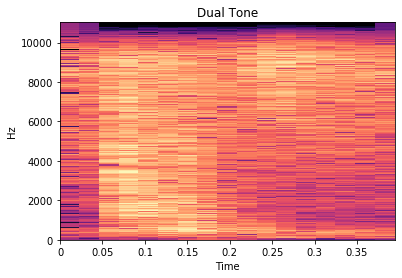

In [16]:
D = np.abs(librosa.stft(np_signals[0, 0, :]))
D = D * pow(10,6)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time')
plt.title('Dual Tone')
#plt.ylim(0, 4000)
plt.show()

In [21]:
D
D.shape

(1025, 17)

In [22]:
# y = D
# D.shape
# X = D
# sample_rate= 20 

In [23]:
X = np_signals[0, 0, :]
sample_rate= 20 

In [26]:
stft = np.abs(librosa.stft(X))
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

STFT를 사용하면 1D에서 2d로 바뀔 수 있다
Prediction target
For 2D-CNN, we trained following 3 labels at the same time.

ttf: time to failure
tsf: time since failure
tqt: total time quake (ttf value at the beginning of quake)
tsf and tqt feature is calculated from ttf information.
I thought learning multiple label works as regularizing effect. But it was not so significant to the performance.

Hyper parameter tuning
We used optuna for hyper parameter tuning.

In [25]:
contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)

ParameterError: Frequency band exceeds Nyquist. Reduce either fmin or n_bands.